# EDA of Monthly Highway Traffic Speed Trends (2019 - 2022) using Python

This dataset reports the historical National Highway System 50th percentile median speeds for various roadway types, months, and vehicles on US roads. Data collected by Department of Transportation.

Features includes:

1. Year
2. Month
3. Vehicle Type
4. Time Period (AM/PM)
5. Area Type
6. Functional Classification
7. Speed: MPH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = 'darkgrid')

In [2]:
traffic_data = pd.read_csv('traffic-speed.csv')
traffic_data.head()

,Year,Month,Vehicle Type,Time Period (AM/PM),Area Type,Functional Classification,Speed
0,2019,Jan,Passenger,AM,Urban,1,54.5
1,2019,Jan,Passenger,AM,Urban,2,49.6
2,2019,Jan,Passenger,AM,Urban,3,27.5
3,2019,Jan,Passenger,AM,Urban,4,24.9
4,2019,Jan,Passenger,AM,Urban,5,19.8


In [3]:
traffic_data.shape

(3556, 7)

In [4]:
traffic_data.describe()

,Year,Functional Classification,Speed
count,3556.000000,3556.000000,3539.000000
mean,2020.661417,4.000000,40.610540
std,1.081275,2.000281,16.238861
min,2019.000000,1.000000,4.000000
25%,2020.000000,2.000000,24.800000
50%,2021.000000,4.000000,42.900000
75%,2022.000000,6.000000,53.900000
max,2022.000000,7.000000,74.100000


In [5]:
traffic_data.isnull().sum()

Year                          0
Month                         0
Vehicle Type                  0
Time Period (AM/PM)           0
Area Type                     0
Functional Classification     0
Speed                        17
dtype: int64

In [6]:
traffic_data.duplicated().sum()

0

In [7]:
traffic_data.dtypes

Year                           int64
Month                         object
Vehicle Type                  object
Time Period (AM/PM)           object
Area Type                     object
Functional Classification      int64
Speed                        float64
dtype: object

In [8]:
traffic_data.columns

Index(['Year', 'Month', 'Vehicle Type', 'Time Period (AM/PM)', 'Area Type',
       'Functional Classification', 'Speed'],
      dtype='object')

In [9]:
traffic_data['Month'].value_counts()

Jun    308
Jul    308
Aug    308
Sep    308
Oct    308
Nov    308
Dec    308
Jan    280
Feb    280
Mar    280
Apr    280
May    280
Name: Month, dtype: int64

In [10]:
traffic_data['Vehicle Type'].value_counts()

Passenger    1344
Freight      1344
All           868
Name: Vehicle Type, dtype: int64

In [11]:
traffic_data['Time Period (AM/PM)'].value_counts()

AM    1778
PM    1778
Name: Time Period (AM/PM), dtype: int64

In [12]:
traffic_data['Area Type'].value_counts()

Urban    1778
Rural    1778
Name: Area Type, dtype: int64

In [13]:
traffic_data['Functional Classification'].value_counts()

1    508
2    508
3    508
4    508
5    508
6    508
7    508
Name: Functional Classification, dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='Year'>

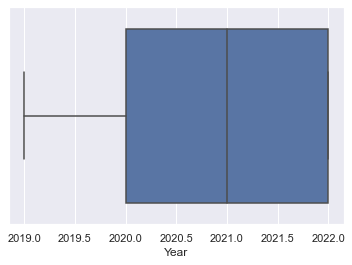

In [14]:
sns.boxplot(data = traffic_data, x= 'Year')

<AxesSubplot:xlabel='Speed'>

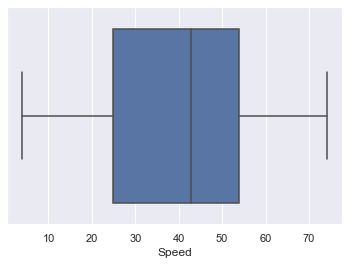

In [15]:
sns.boxplot(data = traffic_data, x = 'Speed')

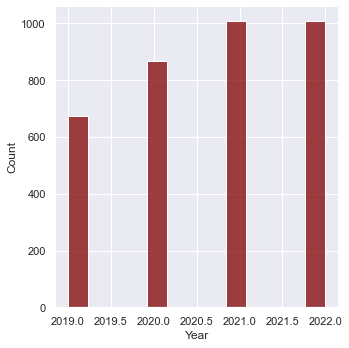

In [16]:
sns.displot(data = traffic_data, x = 'Year', color = 'maroon')

From the above countplot of year we can observed that in 2022.0 and 2021.0 both have count is more than 1000 and the lowest count is in the year of 2019 and the count is 680.

<AxesSubplot:xlabel='Month', ylabel='count'>

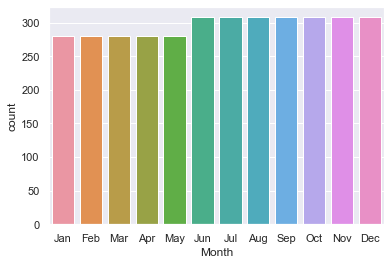

In [17]:
sns.countplot(data = traffic_data, x = 'Month')

The above countplot of month shows us that in Jan to May the count is approximately 280.
And from June to Dec the count is approximately 310.

In [18]:
traffic_data.columns

Index(['Year', 'Month', 'Vehicle Type', 'Time Period (AM/PM)', 'Area Type',
       'Functional Classification', 'Speed'],
      dtype='object')

<AxesSubplot:xlabel='Vehicle Type', ylabel='count'>

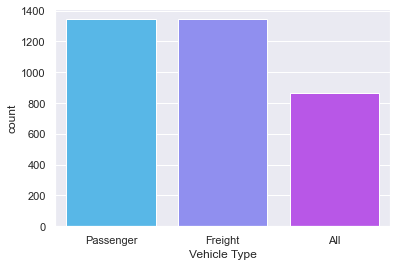

In [19]:
sns.countplot(data = traffic_data, x= 'Vehicle Type', palette= 'cool')

The above countplot shows us that the passenger and freight vehicle type has equal count of 1350 respectivly.
And the lowest count of 830 in all vehicle type.

<AxesSubplot:xlabel='Area Type', ylabel='count'>

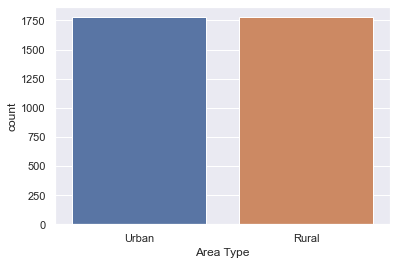

In [20]:
sns.countplot(data= traffic_data, x = 'Area Type')

From the above plot we can observe that urban and rural both have same count of 1751.

# Bivariate Analysis

<AxesSubplot:xlabel='Vehicle Type', ylabel='Speed'>

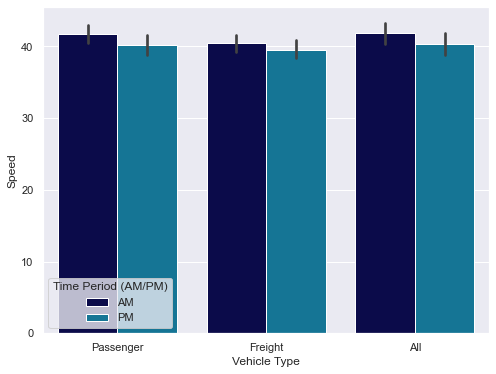

In [21]:
plt.figure(figsize= (8, 6))
sns.barplot(data = traffic_data, x = 'Vehicle Type', y = 'Speed',
            palette= 'ocean', hue = 'Time Period (AM/PM)')

This above plot is between vehicle type vs speed:
1. In passenger vehicle type AM has speed of 42 and PM has speed of 40
2. In freight vehicle type in AM has speed of 41 and PM has speed of 39
3. In all vehicle type in AM has 43 and PM has speed of 40 

<AxesSubplot:xlabel='Area Type', ylabel='Speed'>

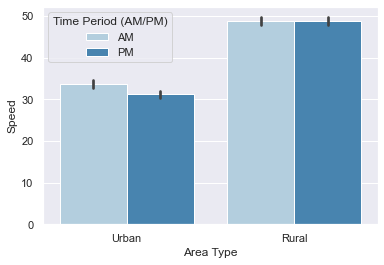

In [22]:
sns.barplot(data = traffic_data, x = 'Area Type', y = 'Speed', 
            hue= 'Time Period (AM/PM)', palette = 'Blues')

1. From the above plot observe that in Urban vehicles have speed of 33 at AM and speed of 30 at PM.
2. And in rural vehicles have speed of 49 in both AM and PM.

<AxesSubplot:xlabel='Month', ylabel='Speed'>

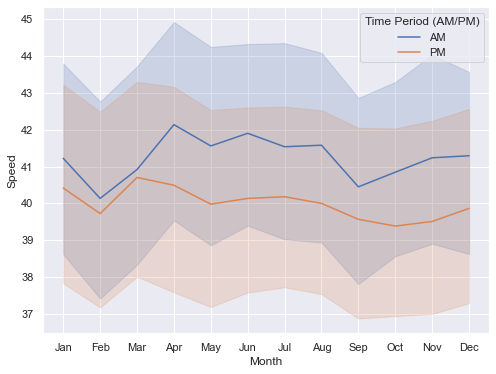

In [23]:
plt.figure(figsize= (8, 6))
sns.lineplot(data = traffic_data, x = "Month", y = "Speed", hue= 'Time Period (AM/PM)')

we can observe that in above plot April has the highest speed of 42.2 at time period in AM and March has the highest speed of 40.8 at time period in PM.

<AxesSubplot:xlabel='Month', ylabel='Speed'>

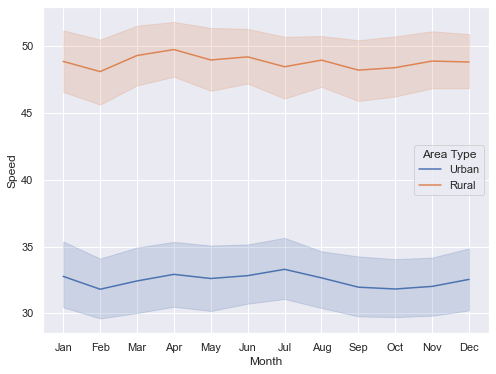

In [24]:
plt.figure(figsize= (8, 6))
sns.lineplot(data = traffic_data, x = "Month", y = "Speed", hue= 'Area Type')

From the above plot we can observe that in Urban type area july have the highest peak of 33.5 speed and in Rural type area the highest peak in april and the speed is 49.5

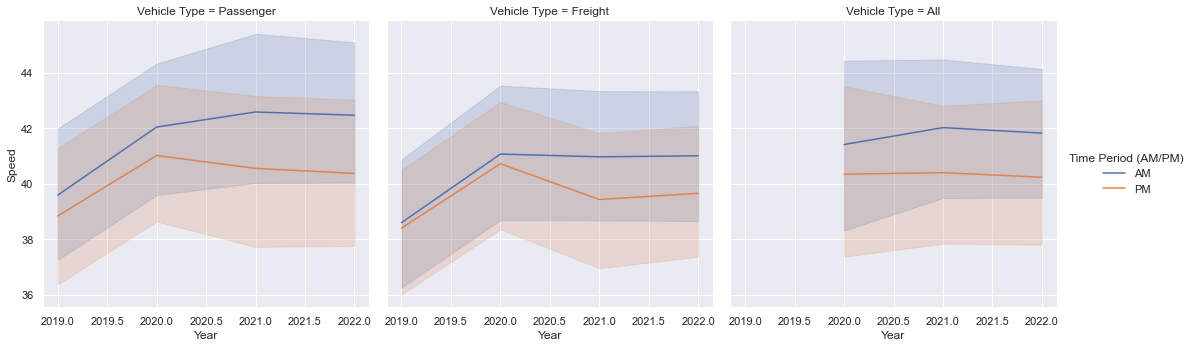

In [25]:
sns.relplot(data = traffic_data, x = 'Year', y = 'Speed', 
            hue= 'Time Period (AM/PM)', col = 'Vehicle Type',
            kind = 'line')

This relplot is between year vs speed :
1. In the first column of passenger we can observed that in year 2020 the speed is 41 in PM and in year 2021 speed of 42.2 in time period AM
2. In column of Freight in year 2020 the speed is at 41 in time period of PM and 40.8 speed in time period of AM
3. In last category of all we can observed that the speed is 40.2 from year 2020 to 2022 at PM and in year 2021 the speed is heighest at 42 in time period of AM

# Correlation

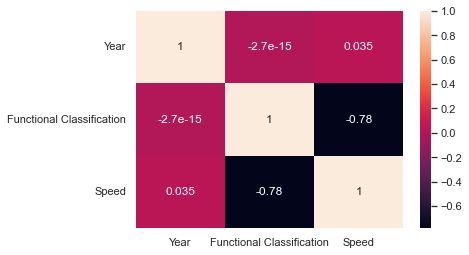

In [26]:
sns.heatmap(traffic_data.corr(), annot = True)
plt.show()

1. In this above correlation the pale boxes block shows correlation shows year vs year, functional classification vs functional classification and speed vs year have perfect correlation.
2. The pink block shows speed, year with 35% of correlation.